## Questão 1

In [1]:
#imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [2]:
def plot(X, y, model):
    clf = model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    scat = plt.scatter(X[:, 0], X[:, 1], c=y,
                      s=20, edgecolor='k')
    
    legends = plt.legend(*scat.legend_elements(), loc="upper left", title="MLP")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [3]:
df_ex5 = pd.read_csv('./dados-ex5.txt', names=['x1','x2','y'])
df_ex5

,x1,x2,y
0,0.771744,-0.548086,1.0
1,0.189416,-0.261982,1.0
2,0.918359,0.443277,0.0
3,1.021213,-0.488523,1.0
4,1.178442,-0.369193,1.0
...,...,...,...
895,1.531981,-0.218318,1.0
896,0.038770,-0.219614,1.0
897,-0.641807,0.325579,0.0
898,0.628552,1.141872,0.0


In [4]:
X = np.array(df_ex5.iloc[:,0:2])
y = np.array(df_ex5.iloc[:, -1])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

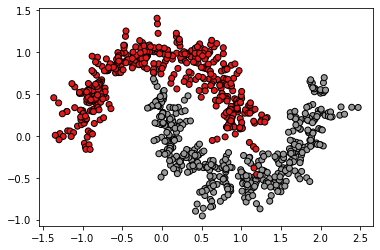

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.show()

## 👇 Com a utilização do random_search conseguimos encontrar os parâmetros que melhores se adequam aos dados.

In [6]:
# Model pre-loadings:
mlp_clf = MLPClassifier(solver='adam', learning_rate='adaptive',max_iter=1300,
                        learning_rate_init=5e-04, tol=1e-4)

classifier = {'MLP': mlp_clf}
param_dist_dict = {'MLP': {"hidden_layer_sizes": list(np.arange(2,500))}}

random_search = dict((k,[]) for k in classifier.keys())

for clf in param_dist_dict.keys():
    print('--------------------------', clf, '--------------------------')
    random_search[clf] = RandomizedSearchCV(classifier[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=5, scoring='accuracy')
    
    random_search[clf].fit(X_train, y_train)
    
#     loss_values = random_search[clf].loss_curve_
#     print(loss_values)

-------------------------- MLP --------------------------
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] hidden_layer_sizes=316 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. hidden_layer_sizes=316, score=0.983, total=   4.8s
[CV] hidden_layer_sizes=316 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] .............. hidden_layer_sizes=316, score=0.996, total=   4.2s
[CV] hidden_layer_sizes=316 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s


[CV] .............. hidden_layer_sizes=316, score=0.988, total=   4.9s
[CV] hidden_layer_sizes=204 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s remaining:    0.0s


[CV] .............. hidden_layer_sizes=204, score=0.979, total=   3.3s
[CV] hidden_layer_sizes=204 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.1s remaining:    0.0s


[CV] .............. hidden_layer_sizes=204, score=0.996, total=   3.5s
[CV] hidden_layer_sizes=204 ..........................................
[CV] .............. hidden_layer_sizes=204, score=0.983, total=   3.6s
[CV] hidden_layer_sizes=72 ...........................................
[CV] ............... hidden_layer_sizes=72, score=0.971, total=   3.6s
[CV] hidden_layer_sizes=72 ...........................................
[CV] ............... hidden_layer_sizes=72, score=0.996, total=   2.3s
[CV] hidden_layer_sizes=72 ...........................................
[CV] ............... hidden_layer_sizes=72, score=0.979, total=   2.5s
[CV] hidden_layer_sizes=65 ...........................................
[CV] ............... hidden_layer_sizes=65, score=0.971, total=   2.1s
[CV] hidden_layer_sizes=65 ...........................................
[CV] ............... hidden_layer_sizes=65, score=0.996, total=   2.7s
[CV] hidden_layer_sizes=65 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   51.9s finished


In [7]:
mlp_clf = random_search['MLP'].best_estimator_
print("\n\nBest estimator: \n{}".format(mlp_clf))



Best estimator: 
MLPClassifier(hidden_layer_sizes=316, learning_rate='adaptive',
              learning_rate_init=0.0005, max_iter=1300)


In [8]:
mlp_clf_perfect = MLPClassifier(hidden_layer_sizes=321, learning_rate='adaptive',
              learning_rate_init=0.0005, max_iter=1300)

the final loss = 0.039
the accuracy = 0.983


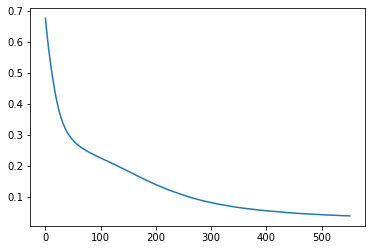

In [9]:
mlp_clf_perfect.fit(X_train, y_train)
loss_values_perfect = mlp_clf_perfect.loss_curve_
final_loss_perfect = loss_values_perfect[-1]
print('the final loss = {:.3f}'.format(final_loss_perfect))

y_predict_perfect = mlp_clf_perfect.predict(X_test)
acc_mlp_perfect = accuracy_score(y_test, y_predict_perfect)
print('the accuracy = {:.3f}'.format(acc_mlp_perfect))

# print(loss_values_perfect)

plt.plot(loss_values_perfect)
plt.show()

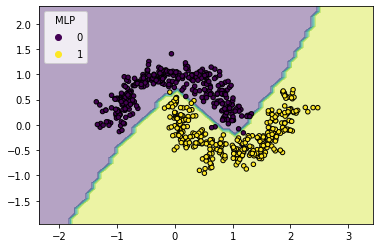

In [10]:
plot(X_train, y_train, mlp_clf_perfect)

## 👇 Para ir de acordo com a atividade irei testar 3 formas diferentes e pegar a melhor e a pior das 3

`mlp_clf_1`

In [11]:
mlp_clf_1 = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.3, max_iter=10)

mlp_clf_1.fit(X_train, y_train)
loss_values_1 = mlp_clf_1.loss_curve_
final_loss_1 = loss_values_1[-1]

print(loss_values_1)

y_predict_1 = mlp_clf_1.predict(X_test)
acc_mlp_1 = accuracy_score(y_test, y_predict_1)

[0.5057563656368563, 0.3122038424718322, 0.2686534258731589, 0.24795930308684477, 0.24323585208799936, 0.24208251621172505, 0.23694945481090157, 0.236782990198828, 0.24438341005344144, 0.2549625876155639]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
print('the final loss = {:.3f}'.format(final_loss_1))
print('the accuracy = {:.3f}'.format(acc_mlp_1))

the final loss = 0.255
the accuracy = 0.872


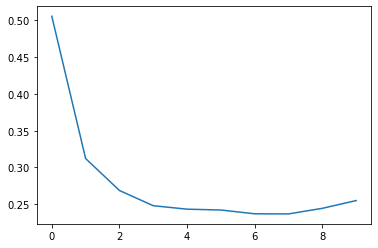

In [13]:
plt.plot(loss_values_1)
plt.show()

`mlp_clf_2`

In [14]:
mlp_clf_2 = MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.03, max_iter=100)

mlp_clf_2.fit(X_train, y_train)
loss_values_2 = mlp_clf_2.loss_curve_
final_loss_2 = loss_values_2[-1]

print(loss_values_2)

y_predict_2 = mlp_clf_2.predict(X_test)
acc_mlp_2 = accuracy_score(y_test, y_predict_2)

[0.5458880328206054, 0.3245356514914738, 0.28938306058032637, 0.2529934553686523, 0.2424718108367244, 0.22458680026532643, 0.2077787495765182, 0.19001936815564918, 0.1768571377298915, 0.15094588795932967, 0.13141389738896073, 0.11293872649551442, 0.09718187957447426, 0.0798208266756392, 0.0715151089367109, 0.05937033339123017, 0.053145871764480566, 0.04774534964159284, 0.04377313154161667, 0.040957977942695206, 0.03816430639888244, 0.03676328069260438, 0.03510735108352785, 0.033448581302269256, 0.032466871703285244, 0.0313659030573547, 0.030778325811996726, 0.0302491789361844, 0.02914482231171109, 0.030347881131044932, 0.031325623659605346, 0.029511847259953657, 0.028383804972061603, 0.029514112684152456, 0.0284046710362027, 0.028580917858446856, 0.026306743519796085, 0.026922218844382683, 0.025243353530396126, 0.02701212392886863, 0.025409471277980166, 0.02563443594747848, 0.024964488451243286, 0.02483101620227871, 0.0238978236425004, 0.02453237643169892, 0.023608171377591032, 0.02434

In [15]:
print('the final loss = {:.3f}'.format(final_loss_2))
print('the accuracy = {:.3f}'.format(acc_mlp_2))

the final loss = 0.023
the accuracy = 0.989


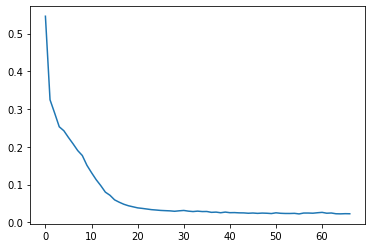

In [16]:
plt.plot(loss_values_2)
plt.show()

`mlp_clf_3`

In [17]:
mlp_clf_3 = MLPClassifier(hidden_layer_sizes=1000, learning_rate_init=0.003, max_iter=1000)

mlp_clf_3.fit(X_train, y_train)
loss_values_3 = mlp_clf_3.loss_curve_
final_loss_3 = loss_values_3[-1]

print(loss_values_3)

y_predict_3 = mlp_clf_3.predict(X_test)
acc_mlp_3 = accuracy_score(y_test, y_predict_3)

[0.6118193255710058, 0.4709072979006581, 0.379647075655437, 0.32890423628238546, 0.30008391227421005, 0.2822733864056815, 0.26902607750287866, 0.2559559439109821, 0.24491572104585957, 0.23926899418524203, 0.23405571252683957, 0.22847692972385103, 0.22112012618520854, 0.212987394252372, 0.2071378411342256, 0.19934391821505176, 0.19272727464163247, 0.18471307550371435, 0.1790899703619311, 0.17130044647456186, 0.16256461887225776, 0.15533285905085695, 0.14739731074648021, 0.14064157331389532, 0.13214756920865714, 0.12573580874818563, 0.1180960601045022, 0.1119300820804801, 0.10553758664944733, 0.0997220360360087, 0.09412558547072833, 0.08912622835861404, 0.08416429250792591, 0.08007584725696801, 0.07619934433548443, 0.07259255599766706, 0.06907455002212139, 0.0658940299812151, 0.06319579281113799, 0.06100880157917439, 0.059050128795479634, 0.056347210754901324, 0.054594734606028886, 0.05267595376161496, 0.051375708929151644, 0.04967910940371948, 0.04835186716692912, 0.047156207271493666, 

In [18]:
print('the final loss = {:.3f}'.format(final_loss_3))
print('the accuracy = {:.3f}'.format(acc_mlp_3))

the final loss = 0.021
the accuracy = 0.983


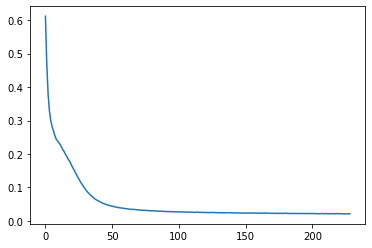

In [19]:
plt.plot(loss_values_3)
plt.show()

### Como foi observado dos 3 testes, o primeiro foi o que se saiu pior (mlp_clf_1) e o segundo foi o que se saiu melhor (mlp_clf_2), superficie de decisão de cada um deles respectivamente:

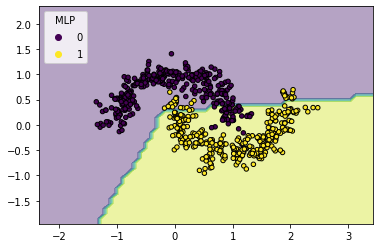

In [20]:
plot(X_train, y_train, mlp_clf_1)

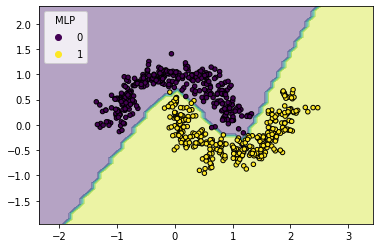

In [21]:
plot(X_train, y_train, mlp_clf_2)

## Questão 2